In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition 
import matplotlib.pyplot as plt


In [73]:
data = pd.read_csv("../data/dataset.csv")
data.head()

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


<h3> Pre-processing</h3>

In [74]:
data["day_cycle_window_temp"] = data["day_cycle_window"].str.split("_")
data.insert(0,'day',data["day_cycle_window_temp"].apply(lambda x: int(x[0])))
data.insert(1,'cycle',data["day_cycle_window_temp"].apply(lambda x: int(x[1])))
data.insert(2,'window',data["day_cycle_window_temp"].apply(lambda x: int(x[2])))
data.drop(columns={"day_cycle_window_temp"}, inplace=True)
data.drop(columns={"day_cycle_window"}, inplace=True)


<h3>Analysis</h3>

In [75]:
data.describe()

,day,cycle,window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000
mean,2.586323,2.337716,73.277587,0.000009,0.000011,0.000031,0.000005,0.000016,-0.000005,-0.000002,0.000003,-0.000021,0.000026,0.000030
std,1.115984,1.170402,50.556205,0.999950,0.999925,0.999961,0.999925,0.999963,0.999926,0.999950,0.999949,0.997770,0.999686,0.999847
min,1.000000,1.000000,1.000000,-3.211980,-3.395387,-3.325651,-3.378450,-3.281286,-4.200181,-3.898025,-3.524957,-13.704556,-12.044778,-3.183571
25%,2.000000,1.000000,30.000000,-0.678808,-0.482716,-0.629123,-0.491585,-0.612334,-0.559023,-0.606135,-0.736398,-0.593096,-0.498480,-0.658530
50%,3.000000,2.000000,63.000000,0.041883,0.180361,0.041442,0.147397,0.117040,0.153972,0.186038,-0.012354,-0.034882,-0.257635,-0.015437
75%,4.000000,3.000000,114.000000,0.743973,0.656920,0.659246,0.636887,0.712393,0.685353,0.718237,0.802395,0.508232,0.359773,0.636740
max,4.000000,5.000000,181.000000,5.013899,6.260782,8.652950,8.359670,6.424227,5.638259,3.735957,4.667058,8.203706,5.597387,9.204384


On remarque plusieurs choses interessantes sur cette premiere analyse très simple : toute les données sont centré normées (moyenne à 0 et variance égale à 1)

**PCA**

In [79]:
def mean_norm(df):
    return df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df = data.copy()
df.drop(["day",'cycle','window'],axis = 1, inplace=True)
df = mean_norm(df)
df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,-0.805240,-1.142090,-1.328410,-1.516811,-1.374029,-0.808325,-1.070598,-0.504380,2.813441,0.495657,-1.246957
1,-0.805240,-1.134998,-1.320476,-1.505965,-1.361626,-0.807895,-1.064263,-0.516029,2.900666,0.494596,-1.244692
2,-0.805240,-1.117399,-1.307249,-1.505965,-1.361626,-0.807895,-1.064263,-0.516029,2.988589,0.429478,-1.244692
3,-0.814281,-1.114301,-1.287674,-1.442415,-1.287629,-0.807895,-1.045607,-0.516029,3.070165,0.348139,-1.244692
4,-0.848156,-1.112371,-1.285474,-1.429188,-1.270785,-0.807895,-1.017624,-0.664943,3.056073,0.118839,-1.270461


In [80]:
pca = sklearn.decomposition.PCA()
pca.fit(df)
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[0.61708616 0.12582397 0.05040478 0.04261311 0.03774242 0.0362675
 0.02856998 0.0212243  0.01927004 0.01477259 0.00622515]


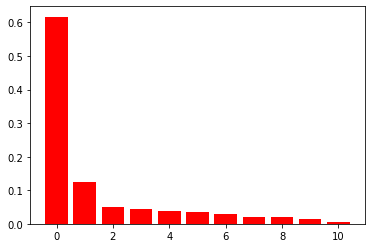

In [82]:
variance_ratio = pca.explained_variance_ratio_
plt.bar(range(df.shape[1]), variance_ratio, color="r", align="center")
plt.show()

In [59]:
df.shape[1]


14